# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [164]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [165]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

import random
import string
import timeit
import matplotlib.pyplot as plt

#####################
# AVL Tree Helpers
#####################

class AVLNode:
    def __init__(self, value: str):
        self.value: str = value
        self.left:AVLNode = None
        self.right:AVLNode = None
        self.height:int = 1

def height(node) -> int:
    if not node:
        return 0
    return node.height

def balance_factor(node) -> int:
    if not node:
        return 0
    return height(node.left) - height(node.right)

def update_height(node):
    if not node:
        return
    node.height = max(height(node.left), height(node.right)) + 1


def right_rotate(y):
    """Right rotate the unbalanced node"""

    x = y.left
    T2 = x.right
    x.right = y
    y.left = T2

    update_height(y)
    update_height(x)

    return x

def left_rotate(x):
    """Left rotate the unbalanced node"""

    y = x.right
    T2 = y.left
    y.left = x
    x.right = T2

    update_height(x)
    update_height(y)

    return y

def balance(node):
    bf = balance_factor(node)
    if bf > 1:
        if balance_factor(node.left) < 0:  # LR
            node.left = left_rotate(node.left)
        return right_rotate(node) ## LL
    if bf < -1:
        if balance_factor(node.right) > 0: # RL
            node.right = right_rotate(node.right)
        return left_rotate(node)  ## RR
    return node

#########################
# LLRB BST Helpers
#########################

# Colors: True represents RED, False represents BLACK.
RED = True
BLACK = False

class LLRBNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.color = RED
        
def isRed(node):
    return node is not None and node.color == RED

def rotateLeft(n):
    x = n.right
    n.right = x.left
    x.left = n
    x.color = n.color
    n.color = RED
    return x

def rotateRight(n):
    x = n.left
    n.left = x.right
    x.right = n
    x.color = n.color
    n.color = RED
    return x

def flipColors(n):
    n.color = RED
    n.left.color = BLACK
    n.right.color = BLACK

#####################
# Scape Goat Tree Helpers
#####################

import math

class SGTNode:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.size = 1  # Number of nodes in the subtree

def size(node):
    """Returns the size of a subtree rooted at 'node'."""
    return node.size if node else 0

def updateSize(node):
    """Updates the size attribute of a node based on its children's sizes."""
    if node:
        node.size = 1 + size(node.left) + size(node.right)

def flattenTree(node, arr):
    """Performs an in-order traversal and stores nodes in an array."""
    if node:
        flattenTree(node.left, arr)
        arr.append(node)
        flattenTree(node.right, arr)

def buildBalancedTree(arr, start, end):
    """Builds a balanced BST from a sorted array of nodes."""
    if start > end:
        return None
    mid = (start + end) // 2
    root = arr[mid]
    root.left = buildBalancedTree(arr, start, mid - 1)
    root.right = buildBalancedTree(arr, mid + 1, end)
    updateSize(root)
    return root

def rebuildTree(root):
    """Rebuilds a subtree rooted at 'root' into a balanced tree."""
    arr = []
    flattenTree(root, arr)
    
    if len(arr) < 2:  # ✅ Fix: Avoid unnecessary rebuilds
        return root  

    return buildBalancedTree(arr, 0, len(arr) - 1)



Use the cell below to implement the requested API by means of **AVL Tree** (if among your chosen data structure).

In [166]:
class AVLTree(AbstractSearchInterface):
    def __init__(self):
        self.root = None

    def _insert(self, node, element) -> tuple[AVLNode, bool]:
        if not node:
            return AVLNode(element), True
    
        if element == node.value:
            return node, False
        if element < node.value:
            node.left, inserted = self._insert(node.left, element)
        else:
            node.right, inserted = self._insert(node.right, element)
        
        if not inserted:
            return node, False
        
        update_height(node)
        return balance(node), True

    def insertElement(self, element):
        self.root, inserted = self._insert(self.root, element)
        return inserted
    
    def _search(self, node, element) -> bool:
        if not node:
            return False

        if element == node.value:
            return True

        if element < node.value:
            return self._search(node.left, element)
        else:
            return self._search(node.right, element)

    def searchElement(self, element):     
        
        return self._search(self.root, element)

Use the cell below to implement the requested API by means of **LLRB BST** (if among your chosen data structure).

In [167]:
        
class LLRBBST(AbstractSearchInterface):
        
    def __init__(self):
        self.root = None

    def insertElement(self, element):
        def _insert(node, element):
            if node is None:
                return LLRBNode(element, element)  # Create a new red node
            
            if element < node.key:
                node.left = _insert(node.left, element)
            elif element > node.key:
                node.right = _insert(node.right, element)
            
            # Fix Red-Black Tree Violations
            if isRed(node.right) and not isRed(node.left):
                node = rotateLeft(node)
            if isRed(node.left) and isRed(node.left.left):
                node = rotateRight(node)
            if isRed(node.left) and isRed(node.right):
                flipColors(node)
            
            return node
        
        # if self.searchElement(element):  # Avoid duplicate insertions
        #     return False
        
        self.root = _insert(self.root, element)
        self.root.color = BLACK  # Root should always be black
        return True
    
    def searchElement(self, element):
        def _search(node, element):
            if node is None:
                return False
            if element < node.key:
                return _search(node.left, element)
            elif element > node.key:
                return _search(node.right, element)
            else:
                return True  # Element found
        
        return _search(self.root, element)


Use the cell below to implement the requested API by means of **Scapegoat Tree** (if among your chosen data structure).

In [168]:
class ScapegoatTree(AbstractSearchInterface):
        
#     def insertElement(self, element):
#         inserted = False
#         # ADD YOUR CODE HERE
      
        
#         return inserted
    
    

#     def searchElement(self, element):     
#         found = False
#         # ADD YOUR CODE HERE

        
#         return found 

        
    def __init__(self, alpha=0.75):
        self.root = None
        self.alpha = alpha  # Scapegoat threshold
        self.max_size = 0  # Track maximum tree size before rebuilding

    def _insert(self, node, key, value):
        """Recursive insertion function."""
        if node is None:
            return SGTNode(key, value)

        if key < node.key:
            node.left = self._insert(node.left, key, value)
        elif key > node.key:
            node.right = self._insert(node.right, key, value)
        else:
            node.value = value  # Update value if key exists
        
        updateSize(node)

        # 🔹 Rebuild only if the **subtree** is unbalanced
        if size(node.left) > self.alpha * size(node) or size(node.right) > self.alpha * size(node):
            node = rebuildTree(node)  # ✅ Fix: Avoid infinite loop

        return node


    def insertElement(self, key):
        """Public insert method that ensures tree balance."""
        self.root = self._insert(self.root, key, None)
        if size(self.root) > self.alpha * self.max_size:  # 🔹 Only update max_size if not rebuilt
            self.max_size = size(self.root)
        return True


    def _search(self, node, key):
        """Recursive search function."""
        if node is None:
            return False
        if key == node.key:
            return True
        elif key < node.key:
            return self._search(node.left, key)
        else:
            return self._search(node.right, key)

    def searchElement(self, key):
        """Public search method."""
        return self._search(self.root, key)

        
    





Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [169]:
from typing import List
    
class TestDataGenerator:
    '''
    A class to represent a synthetic data generator.
    '''
    def __init__(self, size, length=10):
        self.size = size
        self.length = length
    
    # def generate_data(self):
    #     return [''.join(random.choices(string.ascii_letters, k=self.length)) 
    #             for _ in range(self.size)]
    
    def generate_random_strings(self, size) -> List[str]:
        """Generate a list of random strings."""

        return [''.join(random.choice(string.ascii_lowercase) for _ in range(self.length)) for _ in range(size)]

    def sorted_strings(self, random_strings: List[str]) -> List[str]:
        """Sort the random generated strings."""

        return sorted(random_strings)
    
    def almost_sorted_strings(self, random_strings: List[str]) -> list[str]:

        data = self.sorted_strings(random_strings)
        size = len(data)
        for _ in range(size // 10):
            i, j = random.sample(range(size), 2)
            data[i], data[j] = data[j], data[i]
        return data


Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [170]:


class ExperimentalFramework:
    '''
    A class to represent an experimental framework.
    '''
    def __init__(self, data_structures, dataset_sizes):
        # data_structures is a dictionary mapping names to instances
        self.data_structures = data_structures
        self.dataset_sizes = dataset_sizes
        # Results stored as: {name: [(dataset_size, avg_insert_time, avg_search_time), ...]}
        self.results = {
                    ds_class.__name__: {
                        'Random Insert': [], 
                        'Sorted Insert': [], 
                        'Almost Sorted Insert': [], 
                        'Search': []
                    } for ds_class in self.data_structures
                        }
    
    
    def run(self):
        """Run the performance tests for all trees across all dataset sizes."""
        for size in self.dataset_sizes:
            # print(f"\nTesting with Input Size: {size}")
            data_gen = TestDataGenerator(size)
            
            # Generate three data forms based on the same random base
            base_random = data_gen.generate_random_strings(size)
            random_data = base_random.copy()
            sorted_data = data_gen.sorted_strings(base_random)
            almost_sorted_data = data_gen.almost_sorted_strings(base_random)

            # Test each tree type
            for ds_class in self.data_structures:
                tree_name = ds_class.__name__
                # print(f"Testing {tree_name}...")

                # Measure time for inserting random data
                tree = ds_class()
                start = timeit.default_timer()
                for item in random_data:
                    tree.insertElement(item)
                insert_random_time = timeit.default_timer() - start
                self.results[tree_name]['Random Insert'].append(round(insert_random_time, 5))

                # Measure time for inserting sorted data
                tree = ds_class()  # Create a fresh instance
                start = timeit.default_timer()
                for item in sorted_data:
                    tree.insertElement(item)
                insert_sorted_time = timeit.default_timer() - start
                self.results[tree_name]['Sorted Insert'].append(round(insert_sorted_time, 5))

                # Measure time for inserting almost sorted data
                tree = ds_class()  # Create a fresh instance
                start = timeit.default_timer()
                for item in almost_sorted_data:
                    tree.insertElement(item)
                insert_almost_sorted_time = timeit.default_timer() - start
                self.results[tree_name]['Almost Sorted Insert'].append(round(insert_almost_sorted_time, 5))

                # Measure time for searching all elements in the tree
                start = timeit.default_timer()
                for item in base_random: 
                    tree.searchElement(item)
                search_time = timeit.default_timer() - start
                self.results[tree_name]['Search'].append(round(search_time, 5))

        self.print_results()
        self.plot_results()

    def print_results(self):
        """Print the performance results in a formatted manner."""
        print("\nFinal Results:")
        print(f"Input Size: \t {self.dataset_sizes}")
        for tree_name in self.results:
            print(f"\n{tree_name}:")
            for metric, times in self.results[tree_name].items():
                print(f"{metric}: \t {times}")

    def plot_results(self):
            """Plot the performance results in four separate figures with linear scales."""
            metrics = ['Random Insert', 'Sorted Insert', 'Almost Sorted Insert', 'Search']
            titles = [
                'Random Insert Performance',
                'Sorted Insert Performance',
                'Almost Sorted Insert Performance',
                'Search Performance'
            ]
            colors = {'AVLTree': 'blue', 'LLRBBST': 'green', 'ScapegoatTree': 'red'}
            
            for metric, title in zip(metrics, titles):
                plt.figure(figsize=(10, 6))
                for tree_name in self.results:
                    plt.plot(
                        self.dataset_sizes, 
                        self.results[tree_name][metric], 
                        label=tree_name, 
                        marker='o', 
                        color=colors[tree_name],
                        linewidth=2
                    )
                
                # Use linear scales for both X and Y axes
                plt.xlabel('Input Size (n)')
                plt.ylabel('Time (seconds)')
                plt.title(title)
                plt.legend()
                plt.grid(True, which="both", ls="--")
                plt.show()
                
    # def run_experiment(self):
    #     for size in self.dataset_sizes:
    #         data_gen = TestDataGenerator(size)
    #         dataset = data_gen.generate_data()
    #         for name, ds in self.data_structures.items():
    #             # Create a fresh instance for each run for fairness
    #             if name == 'AVL Tree':
    #                 ds = AVLTree()
    #             elif name == 'LLRB BST':
    #                 ds = LLRBBST()
    #             elif name == 'Scape-Goat':
    #                 ds = ScapegoatTree()  
    #             else:
    #                 continue
                
    #             insert_times = []
    #             search_times = []
                
    #             # Measure insertion times (excluding data generation overhead)
    #             for item in dataset:
    #                 start = timeit.default_timer()
    #                 ds.insertElement(item)
    #                 insert_times.append(timeit.default_timer() - start)
                
    #             # Measure search times
    #             for item in dataset:
    #                 start = timeit.default_timer()
    #                 ds.searchElement(item)
    #                 search_times.append(timeit.default_timer() - start)
                
    #             avg_insert = sum(insert_times) / len(insert_times) if insert_times else 0
    #             avg_search = sum(search_times) / len(search_times) if search_times else 0
    #             self.results.setdefault(name, []).append((size, avg_insert, avg_search))



    # def plot_results(self):
    # # Plot insertion times in a separate figure
    #     plt.figure(figsize=(10, 5))
    #     for name, data in self.results.items():
    #         sizes, insert_times, _ = zip(*data)
    #         plt.plot(sizes, insert_times, marker='o', label=name)
    #     plt.xlabel('Dataset Size')
    #     plt.ylabel('Average Insertion Time (s) per operation')
    #     plt.title('Insertion Performance of Search Data Structures')
    #     plt.legend()
    #     plt.grid(True)
    #     plt.show()
        
    #     # Plot search times in a separate figure
    #     plt.figure(figsize=(10, 5))
    #     for name, data in self.results.items():
    #         sizes, _, search_times = zip(*data)
    #         plt.plot(sizes, search_times, marker='o', label=name)
    #     plt.xlabel('Dataset Size')
    #     plt.ylabel('Average Search Time (s) per operation')
    #     plt.title('Search Performance of Search Data Structures')
    #     plt.legend()
    #     plt.grid(True)
    #     plt.show()



Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

In [171]:
# ADD YOUR TEST CODE HERE 


# Example test code: choose three data structures and run experiments.
# if __name__ == '__main__':
#     data_structures = {
#         'AVL Tree': AVLTree(),
#         'LLRB BST': LLRBBST(),
#         'Scape-Goat': ScapegoatTree()
#     }
#     # data_structures = [AVLTree, LLRBBST, ScapegoatTree]
#     # Define various dataset sizes to stress-test the structures.
#     dataset_sizes = [100, 500, 1000, 1500, 2000, 3000, 4000, 5000, 10000]
    
#     experiment = ExperimentalFramework(data_structures, dataset_sizes)
#     # experiment.run_experiment()
#     # experiment.plot_results()
#     experiment.run()




Final Results:
Input Size: 	 [100, 500, 1000, 2000, 4000, 6000, 12000, 24000, 48000, 96000]

AVLTree:
Random Insert: 	 [0.00018, 0.00111, 0.0025, 0.0055, 0.01156, 0.01866, 0.09721, 0.093, 0.20644, 0.46443]
Sorted Insert: 	 [0.00017, 0.00111, 0.00259, 0.0055, 0.01278, 0.01857, 0.04049, 0.08823, 0.19119, 0.41048]
Almost Sorted Insert: 	 [0.00017, 0.00112, 0.00297, 0.00566, 0.01338, 0.02035, 0.04718, 0.0979, 0.21349, 0.52898]
Search: 	 [3e-05, 0.0002, 0.00052, 0.00102, 0.00255, 0.00372, 0.0097, 0.02335, 0.0483, 0.12025]

LLRBBST:
Random Insert: 	 [0.00014, 0.0011, 0.00214, 0.00473, 0.00963, 0.01589, 0.03385, 0.14452, 0.23395, 0.44723]
Sorted Insert: 	 [0.00013, 0.00094, 0.00195, 0.0043, 0.00962, 0.01594, 0.03357, 0.0695, 0.15181, 0.38834]
Almost Sorted Insert: 	 [0.00013, 0.0012, 0.00206, 0.00435, 0.00995, 0.01554, 0.03493, 0.08426, 0.22976, 0.43674]
Search: 	 [4e-05, 0.00022, 0.00067, 0.00136, 0.00268, 0.00533, 0.00967, 0.02805, 0.05271, 0.1253]

ScapegoatTree:
Random Insert: 	 [0.00021

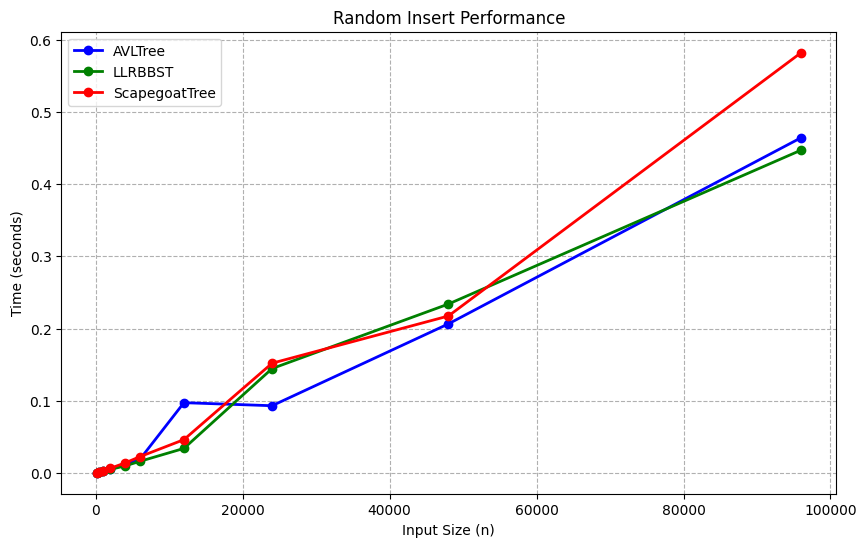

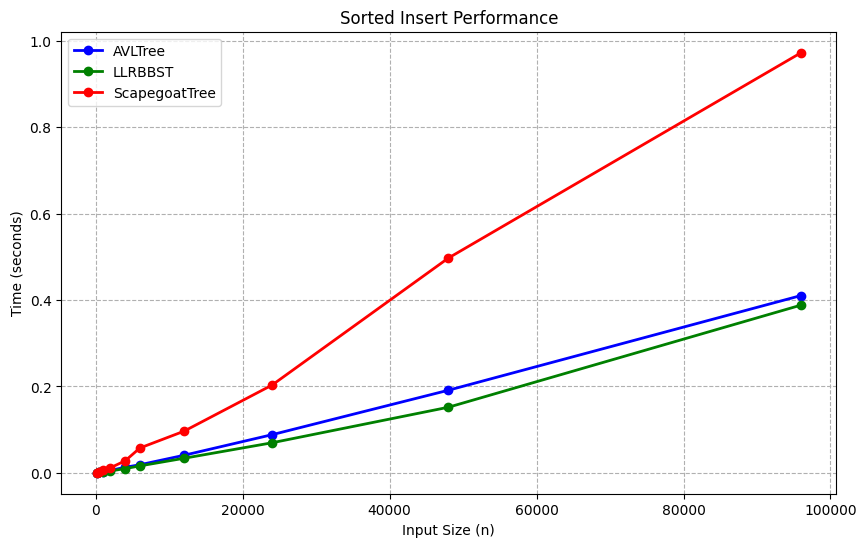

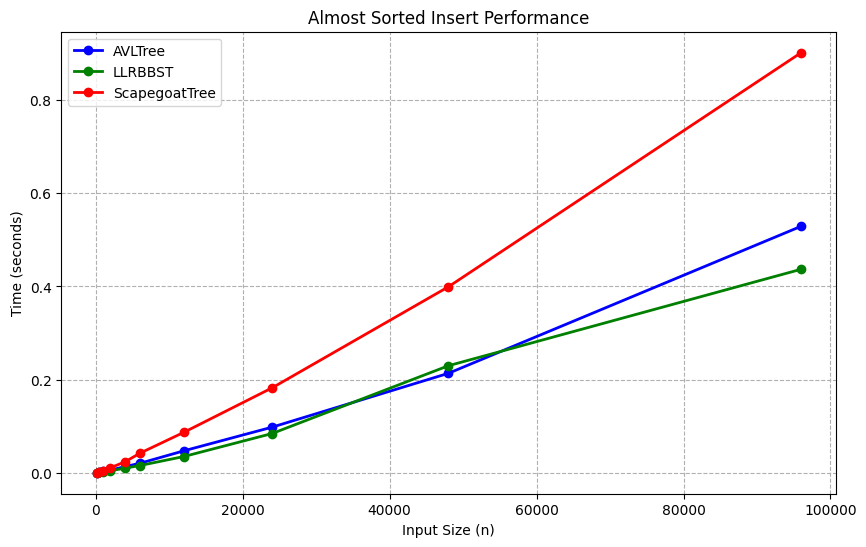

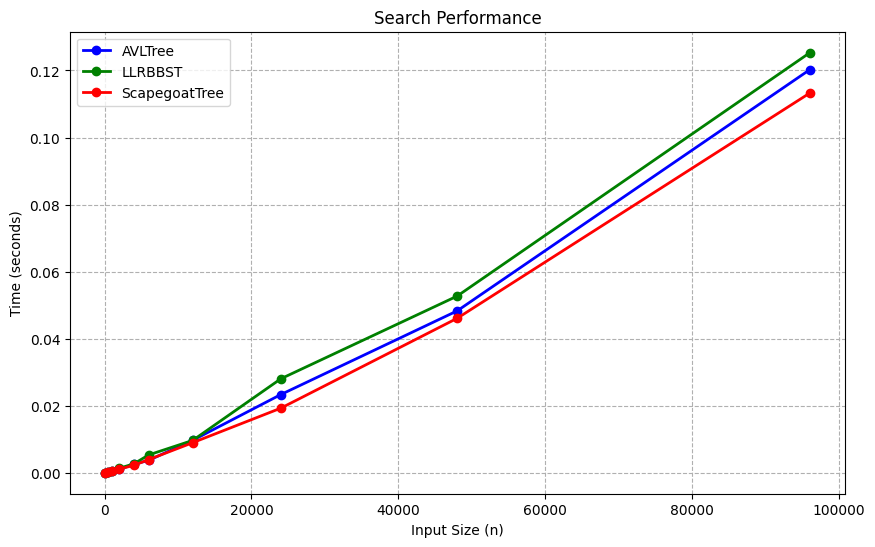

In [172]:
if __name__ == '__main__':
    # data_structures = {
    #     'AVL Tree': AVLTree(),
    #     'LLRB BST': LLRBBST(),
    #     'Scape-Goat': ScapegoatTree()
    # }
    data_structures = [AVLTree, LLRBBST, ScapegoatTree]
    
    # Define various dataset sizes to stress-test the structures.
    # dataset_sizes = [10, 100, 500, 900, 1300, 1700, 2100, 2500, 2900, 3300, 3700, 4100, 4500, 4900]
    # dataset_sizes = [100, 500, 1000, 1500, 2000, 3000, 4000, 5000, 8000, 10000]
    # dataset_sizes = [10, 100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
    dataset_sizes = [100, 500, 1000, 2000, 4000, 6000, 12000, 24000, 48000, 96000]
    
    experiment = ExperimentalFramework(data_structures, dataset_sizes)
    # experiment.run_experiment()
    # experiment.plot_results()
    experiment.run()

In [ ]:

# Final Results:
# Input Size: 	 [10, 100, 500, 900, 1300, 1700, 2100, 2500, 2900, 3300, 3700, 4100, 4500, 4900]

# AVLTree:
# Random Insert: 	 [3e-05, 0.0002, 0.0026, 0.00441, 0.00357, 0.0045, 0.00607, 0.00844, 0.00826, 0.01079, 0.01105, 0.01507, 0.01499, 0.01518]
# Sorted Insert: 	 [1e-05, 0.0002, 0.00161, 0.0022, 0.00355, 0.00452, 0.00597, 0.00791, 0.00851, 0.01001, 0.01195, 0.01275, 0.01455, 0.01542]
# Almost Sorted Insert: 	 [1e-05, 0.00022, 0.00146, 0.00253, 0.00408, 0.00588, 0.0064, 0.00773, 0.0098, 0.01057, 0.01201, 0.0136, 0.01484, 0.01625]
# Search: 	 [0.0, 4e-05, 0.00027, 0.00049, 0.00074, 0.001, 0.00125, 0.00173, 0.00176, 0.00192, 0.0021, 0.00314, 0.00276, 0.00307]

# LLRBBST:
# Random Insert: 	 [3e-05, 0.00016, 0.00106, 0.00211, 0.00318, 0.00435, 0.00538, 0.00585, 0.00717, 0.0084, 0.00911, 0.01023, 0.01252, 0.01319]
# Sorted Insert: 	 [1e-05, 0.00015, 0.00118, 0.00198, 0.00311, 0.00391, 0.00665, 0.00602, 0.00725, 0.00804, 0.00924, 0.01059, 0.01121, 0.01233]
# Almost Sorted Insert: 	 [1e-05, 0.00015, 0.00087, 0.00242, 0.00304, 0.00408, 0.00502, 0.00636, 0.00835, 0.00808, 0.00953, 0.01141, 0.01136, 0.01342]
# Search: 	 [0.0, 4e-05, 0.00037, 0.00314, 0.00093, 0.00115, 0.00167, 0.00183, 0.00225, 0.00272, 0.00266, 0.00303, 0.00365, 0.00391]

# ScapegoatTree:
# Random Insert: 	 [2e-05, 0.00024, 0.00125, 0.00235, 0.00445, 0.0056, 0.00707, 0.00768, 0.00948, 0.01049, 0.01238, 0.01426, 0.0152, 0.01759]
# Sorted Insert: 	 [2e-05, 0.00041, 0.00242, 0.00505, 0.00741, 0.01066, 0.0143, 0.01631, 0.01991, 0.02326, 0.02692, 0.03002, 0.03121, 0.03439]
# Almost Sorted Insert: 	 [1e-05, 0.00035, 0.00206, 0.00495, 0.00675, 0.00963, 0.01191, 0.01442, 0.01734, 0.01918, 0.02199, 0.02476, 0.02623, 0.03112]
# Search: 	 [0.0, 4e-05, 0.00022, 0.00046, 0.00093, 0.00104, 0.0013, 0.00176, 0.00161, 0.00182, 0.00216, 0.00248, 0.00295, 0.00302]




In [ ]:
# Final Results:
# Input Size: 	 [10, 100, 500, 1000, 2000, 5000, 10000, 20000, 50000]

# AVLTree:
# Random Insert: 	 [3e-05, 0.00018, 0.00119, 0.0027, 0.00588, 0.01538, 0.03531, 0.07203, 0.2244]
# Sorted Insert: 	 [1e-05, 0.00018, 0.00114, 0.00245, 0.00519, 0.01565, 0.03717, 0.0717, 0.20499]
# Almost Sorted Insert: 	 [1e-05, 0.00018, 0.00125, 0.0027, 0.00636, 0.01888, 0.04639, 0.12771, 0.23605]
# Search: 	 [0.0, 3e-05, 0.00023, 0.00049, 0.00112, 0.00336, 0.00729, 0.01581, 0.05066]

# LLRBBST:
# Random Insert: 	 [2e-05, 0.00013, 0.00119, 0.00206, 0.00476, 0.01243, 0.02798, 0.05892, 0.23815]
# Sorted Insert: 	 [1e-05, 0.00013, 0.00084, 0.00199, 0.00451, 0.0128, 0.02622, 0.0571, 0.16596]
# Almost Sorted Insert: 	 [1e-05, 0.00013, 0.00106, 0.00486, 0.00434, 0.01317, 0.02996, 0.06223, 0.23536]
# Search: 	 [0.0, 4e-05, 0.00028, 0.05715, 0.00216, 0.00363, 0.00806, 0.01863, 0.05506]

# ScapegoatTree:
# Random Insert: 	 [2e-05, 0.00018, 0.00124, 0.00298, 0.00634, 0.01737, 0.03632, 0.08169, 0.23374]
# Sorted Insert: 	 [2e-05, 0.00033, 0.00228, 0.00526, 0.01292, 0.0356, 0.07848, 0.16431, 0.52623]
# Almost Sorted Insert: 	 [1e-05, 0.0003, 0.00233, 0.00443, 0.01089, 0.0313, 0.06603, 0.18922, 0.41991]
# Search: 	 [0.0, 3e-05, 0.00022, 0.00047, 0.00123, 0.00293, 0.00681, 0.01595, 0.04876]

In [ ]:
#   [100, 500, 1000, 2000, 4000, 6000, 12000, 24000, 48000, 96000]
# Final Results:
# Input Size: 	 [100, 500, 1000, 2000, 4000, 6000, 12000, 24000, 48000, 96000]

# AVLTree:
# Random Insert: 	 [0.00018, 0.00111, 0.0025, 0.0055, 0.01156, 0.01866, 0.09721, 0.093, 0.20644, 0.46443]  
# Sorted Insert: 	 [0.00017, 0.00111, 0.00259, 0.0055, 0.01278, 0.01857, 0.04049, 0.08823, 0.19119, 0.41048]  
# Almost Sorted Insert: 	 [0.00017, 0.00112, 0.00297, 0.00566, 0.01338, 0.02035, 0.04718, 0.0979, 0.21349, 0.52898]
# Search: 	 [3e-05, 0.0002, 0.00052, 0.00102, 0.00255, 0.00372, 0.0097, 0.02335, 0.0483, 0.12025]  

# LLRBBST:
# Random Insert: 	 [0.00014, 0.0011, 0.00214, 0.00473, 0.00963, 0.01589, 0.03385, 0.14452, 0.23395, 0.44723]
# Sorted Insert: 	 [0.00013, 0.00094, 0.00195, 0.0043, 0.00962, 0.01594, 0.03357, 0.0695, 0.15181, 0.38834]
# Almost Sorted Insert: 	 [0.00013, 0.0012, 0.00206, 0.00435, 0.00995, 0.01554, 0.03493, 0.08426, 0.22976, 0.43674]
# Search: 	 [4e-05, 0.00022, 0.00067, 0.00136, 0.00268, 0.00533, 0.00967, 0.02805, 0.05271, 0.1253]

# ScapegoatTree:
# Random Insert: 	 [0.00021, 0.0012, 0.00258, 0.00639, 0.01372, 0.02235, 0.046, 0.15192, 0.21736, 0.58225]
# Sorted Insert: 	 [0.00032, 0.00212, 0.00535, 0.01173, 0.02767, 0.05734, 0.09621, 0.20318, 0.49736, 0.97285]
# Almost Sorted Insert: 	 [0.00035, 0.00196, 0.00446, 0.01082, 0.02365, 0.04194, 0.08689, 0.18224, 0.39918, 0.90152]
# Search: 	 [3e-05, 0.00019, 0.00048, 0.0011, 0.00225, 0.00393, 0.00899, 0.01929, 0.04609, 0.11327]